# Notebook- Display Augmented Images 
# Author : V.Albors   Date : 05.02.2020
# Purpose : Display Images  
**Input** : 
  Common Vars : 
  * Directory of the images
  * Files for images
  
**Output**:  
  Augmented image


**Process** :

  * Select and read  image and apply the variants 
      * rotation_range 
      * width_shift_range
      * height_shift_range
      * shear_range
      * zoom_range
      * horizontal_flip 
      * fill_mode
  * Print images

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.keras.backend.clear_session()  # Reset

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU') 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [14]:
#Tensorflow version 
print(tf.__version__)
from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# Cuda Version 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# CudNN 7 in v1.10.0

2.0.0
10.0
7.6


In [15]:
# Define the name of the model 
# Define the name of the model, directories & if to train the model 
Model_directory = "MODELK3"
Model_name = "ModelK3_0"

In [16]:
# Import routines
import sys  
subrc_dir = "/home/valborsf/Documents/UOC/PFMProject/"

sys.path.append(subrc_dir)  
from Models_routines import *          

import inspect

# List functions inside the module
import Models_routines as module
functions = inspect.getmembers(module, inspect.isfunction)
lsfunctions = [item[0] for item in functions]
print ( lsfunctions )

['confusion_ROC_AUC', 'create_column_tensor', 'create_label_tensor', 'create_val_test', 'define_dirs', 'extract_images_bm', 'extract_images_train', 'load_hist_model', 'load_images', 'load_images_tf', 'model_load', 'plot_save_acc_loss', 'print_network', 'process_clinical_info', 'read_dataframes', 'read_dataframes_tables', 'reproducible_results', 'save_model', 'save_network_json', 'start', 'stop', 'to_one_hot', 'to_one_hot_words', 'xi_squared']


In [17]:
# Define directories
(root_dir,json_dir,imag_dir,csv_dir,model_json_dir,model_bin_dir,results_dir,Tensor_dir) = define_dirs(Model_directory)

In [18]:
# New dataset without SONIC disturbing images
json_dir =  root_dir +"/DataNew/ALL_JSON/"                # .json dir images
imag_dir =  root_dir +"/DataNew/ALL_IMAGES/"              # .png dir - images

# directories for  CSV's
csv_dir =  root_dir +"/DataNew4/CSV/"                      # .csv dir - dftrain, dfval, dftest

In [19]:
# Read one image from Train CSV
import pandas as pd 
dftrain = pd.DataFrame()     
dftrain = pd.read_csv(csv_dir+'dftrain.csv')
print(dftrain.shape )

# One image dir 
image = 51         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)

(2100, 9)
/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0000034.jpg


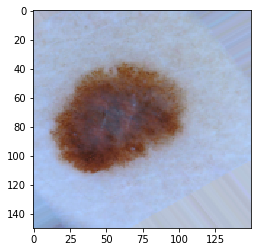

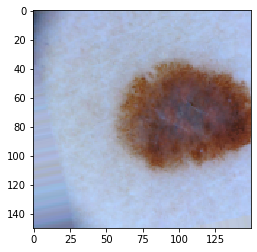

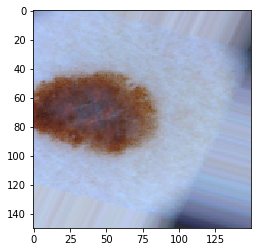

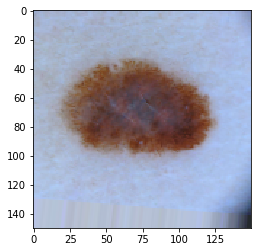

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range =40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode = 'nearest') 


img = image.load_img ( one_image_dir, target_size =(150,150))
x = image.img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

i=0
for batch in datagen.flow ( x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1 
  if i % 4 == 0:
    break
plt.show()



/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0032985.jpg


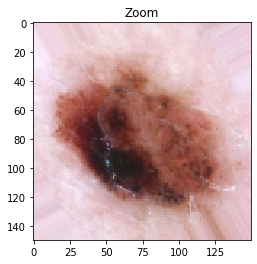

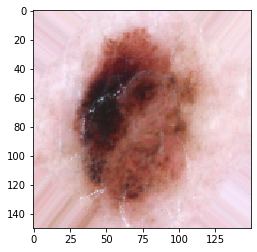

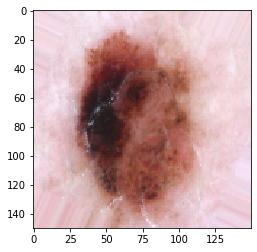

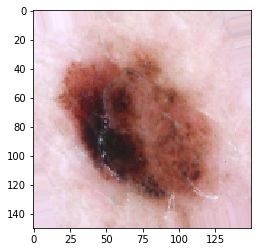

In [37]:
# Rotation 

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img


image = 52         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)


img = load_img ( one_image_dir, target_size =(150,150))
x = img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

datagen = ImageDataGenerator(
    rotation_range =40,
    fill_mode = 'nearest') 



plt.title("Rotation")
i=0
for batch in datagen.flow ( x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i +=1 
  if i % 4 == 0:
    break
plt.show()


/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0032985.jpg


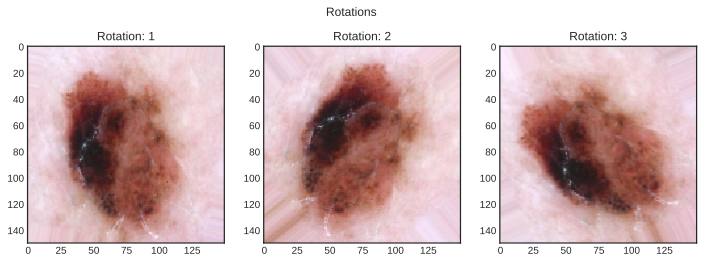

In [75]:
# Rotation
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' # 'svg', 'retina'
#plt.style.use('seaborn-white')

image = 52         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)


img = load_img ( one_image_dir, target_size =(150,150))
x = img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

datagen = ImageDataGenerator(
    rotation_range =70,
    fill_mode = 'nearest') 


# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    
    j=0
    for batch in datagen.flow ( x, batch_size=1):    

      plt.imshow(array_to_img(batch[0]), cmap=plt.cm.jet)
      j +=1 
      if j % 3 == 0:
        break
    plt.title('Rotation: {}'.format(i+1))  
    

plt.suptitle('Rotations')
plt.show()



/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0031813.jpg


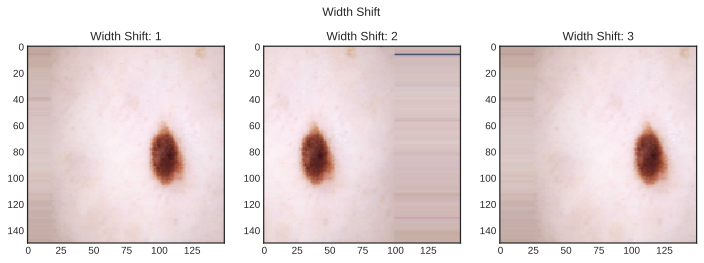

In [77]:
# Display Width Shift 
import numpy as np
import matplotlib.pyplot as plt


image = 53         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)


img = load_img ( one_image_dir, target_size =(150,150))
x = img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

datagen = ImageDataGenerator(
    width_shift_range = 0.4,
    fill_mode = 'nearest') 



# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    
    j=0
    for batch in datagen.flow ( x, batch_size=1):    

      plt.imshow(array_to_img(batch[0]), cmap=plt.cm.jet)
      j +=1 
      if j % 3 == 0:
        break
    plt.title('Width Shift: {}'.format(i+1))  
    

plt.suptitle('Width Shift')
plt.show()

/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0031813.jpg


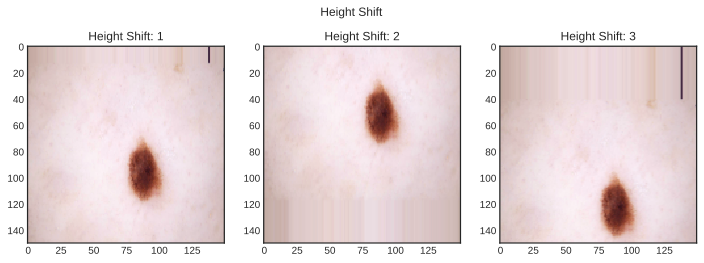

In [68]:
# Display Height Shift 
import numpy as np
import matplotlib.pyplot as plt


image = 53         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)


img = load_img ( one_image_dir, target_size =(150,150))
x = img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

datagen = ImageDataGenerator(
    height_shift_range = 0.4,
    fill_mode = 'nearest') 



# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    
    j=0
    for batch in datagen.flow ( x, batch_size=1):    

      plt.imshow(array_to_img(batch[0]), cmap=plt.cm.jet)
      j +=1 
      if j % 3 == 0:
        break
    plt.title('Height Shift: {}'.format(i+1))  
    

plt.suptitle('Height Shift')
plt.show()

/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0031813.jpg


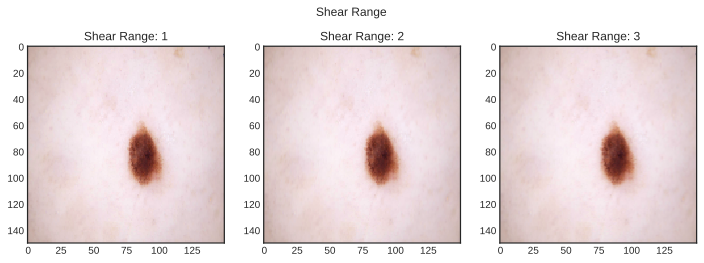

In [70]:
# Shear Range 
import numpy as np
import matplotlib.pyplot as plt


image = 53         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)


img = load_img ( one_image_dir, target_size =(150,150))
x = img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

datagen = ImageDataGenerator(
    shear_range = 0.6,
    fill_mode = 'nearest') 



# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    
    j=0
    for batch in datagen.flow ( x, batch_size=1):    

      plt.imshow(array_to_img(batch[0]), cmap=plt.cm.jet)
      j +=1 
      if j % 3 == 0:
        break
    plt.title('Shear Range: {}'.format(i+1))  
    

plt.suptitle('Shear Range')
plt.show()

/home/valborsf/Documents/UOC/PFMProject/DataNew/ALL_IMAGES/ISIC_0031813.jpg


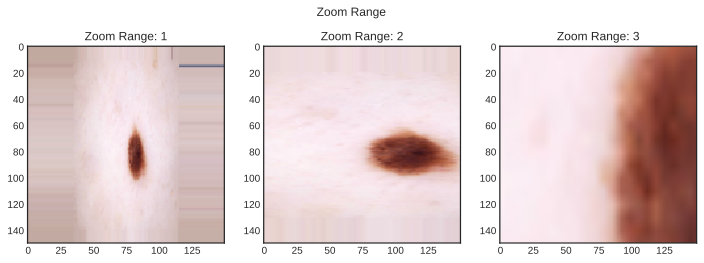

In [83]:
# zoom Range 
import numpy as np
import matplotlib.pyplot as plt


image = 53         # Select the number of image
one_image_dir  = imag_dir + dftrain['file_name_ext'][image]
print ( one_image_dir)


img = load_img ( one_image_dir, target_size =(150,150))
x = img_to_array(img) 

x = x.reshape((1,) + x.shape ) 

datagen = ImageDataGenerator(
    zoom_range = 1.0,
    fill_mode = 'nearest') 



# Show subplots | shape: (1,3) 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    
    j=0
    for batch in datagen.flow ( x, batch_size=1):    

      plt.imshow(array_to_img(batch[0]), cmap=plt.cm.jet)
      j +=1 
      if j % 3 == 0:
        break
    plt.title('Zoom Range: {}'.format(i+1))  
    

plt.suptitle('Zoom Range')
plt.show()